In [1]:
from src.solving_eos import EOS

In [2]:
# 0. Prompt user to create a new molecule object
M = input('Type chemical formula: ')
molecule = EOS(molecule=M)
print("ω = ", molecule.ω)
print("Pc = ", molecule.Pc)
print("Tc = ", molecule.Tc)
print(molecule.antoineq)

Type chemical formula: NH3
ω =  0.255
Pc =  11277000.0
Tc =  405.55
             T1      T2        A         B       C
molecule                                          
NH3       164.0  239.60  3.18757   506.713 -80.780
NH3       239.6  405.55  4.86886  1113.928 -10.409


In [3]:
# 1. Use the Peng-Robinson EOS to compute the liquid and vapor volumes 
# (if applicable) for any pressure, and temperature. Your code should 
# prompt the user to choose between vapor/liquid roots.
print('Molar volume calculations: Enter Temperature [K] and Pressure [bar] for state 1 and state 2 accordingly.')
T1 = float(input('T1 [K] = '))
P1 = float(input('P1 [bar] = '))*1E5
T2 = float(input('T2 [K] = '))
P2 = float(input('P2 [bar] = '))*1E5
#T1 = 200; T2 = 450
#P1 = 0.06E5; P2 = 2.09E5
v1, v2 = molecule.solve_eos([T1, T2], [P1, P2])
print("\n")
print(f"The molar volume calculated at T1={T1} K and P1={P1/1E5} bar is {round(v1, 4)} [m^3/mol]")
print(f"The molar volume calculated at T2={T2} K and P2={P2/1E5} bar is {round(v2, 4)} [m^3/mol]")

Molar volume calculations: Enter Temperature [K] and Pressure [bar] for state 1 and state 2 accordingly.
T1 [K] = 200
P1 [bar] = 0.06
T2 [K] = 450
P2 [bar] = 0.09
Some of the given T and P values lie outside (>) the range of critical conditions: Tc=405.55 & Pc=11277000.0


The molar volume calculated at T1=200.0 K and P1=0.06 bar is 0.2768 [m^3/mol]
The molar volume calculated at T2=450.0 K and P2=0.09 bar is 0.4156 [m^3/mol]


Some of the given T and P values lie outside (>) the range of critical conditions: Tc=405.55 & Pc=11277000.0
Some of the given T and P values lie outside (>) the range of critical conditions: Tc=405.55 & Pc=11277000.0
Some of the given T and P values lie outside (>) the range of critical conditions: Tc=405.55 & Pc=11277000.0
Some of the given T and P values lie outside (>) the range of critical conditions: Tc=405.55 & Pc=11277000.0
Some of the given T and P values lie outside (>) the range of critical conditions: Tc=405.55 & Pc=11277000.0


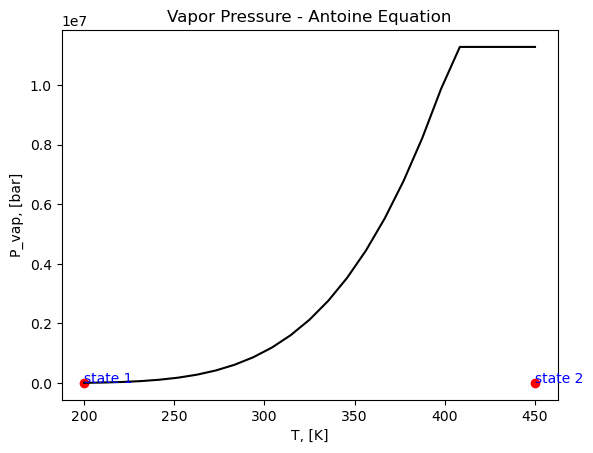

In [4]:
import numpy as np
import matplotlib.pyplot as plt
T = np.linspace(T1, T2, 25)
plt.plot(T, molecule.antoine(T), color='black'); plt.scatter([T1, T2], [P1, P2], color='red')
plt.text(T1, P1, "state 1", color='blue'); plt.text(T2, P2, "state 2", color='blue')
plt.xlabel("T, [K]"); plt.ylabel("P_vap, [bar]")
plt.title("Vapor Pressure - Antoine Equation"); plt.show()

In [5]:
# 2. Compute departure functions (the change between a real, and ideal gas) for H, S, G.
print(f"\nDeparture functions for STATE 1:")
T1 = float(input('T1 [K] = '))
P1 = float(input('P1 [bar] = '))*1E5
phase1 = input("Enter phase conditions of state 1: ")

ΔH1_dep = molecule.ΔH_dep(T1, P1, phase=phase1)
ΔS1_dep = molecule.ΔS_dep(T1, P1, phase=phase1)
ΔG1_dep = molecule.ΔG_dep(T1, P1, phase=phase1)
print(f"ΔH1_dep ({phase1}) = {round(ΔH1_dep, 2)} kJ/mol")
print(f"ΔS1_dep ({phase1}) = {round(ΔS1_dep, 2)} J/(mol K)")
print(f"ΔG1_dep ({phase1}) = {round(ΔG1_dep, 2)} kJ/mol \n")

print(f"\nDeparture functions for STATE 2:")
T2 = float(input('T2 [K] = '))
P2 = float(input('P2 [bar] = '))*1E5
phase2 = input("Enter phase conditions of state 2: ")
ΔH2_dep = molecule.ΔH_dep(T2, P2, phase=phase2)
ΔS2_dep = molecule.ΔS_dep(T2, P2, phase=phase2)
ΔG2_dep = molecule.ΔG_dep(T2, P2, phase=phase2)
print(f"ΔH2_dep ({phase2}) = {round(ΔH2_dep, 2)} kJ/mol")
print(f"ΔS2_dep ({phase2}) = {round(ΔS2_dep, 2)} J/(mol K)")
print(f"ΔG2_dep ({phase2}) = {round(ΔG2_dep, 2)} kJ/mol \n")


Departure functions for STATE 1:
T1 [K] = 450
P1 [bar] = 0.06
Enter phase conditions of state 1: gas
ΔH1_dep (gas) = -1.78 kJ/mol
ΔS1_dep (gas) = -0.0 J/(mol K)
ΔG1_dep (gas) = -0.54 kJ/mol 


Departure functions for STATE 2:
T2 [K] = 200
P2 [bar] = 0.09
Enter phase conditions of state 2: liquid
ΔH2_dep (liquid) = -25398.48 kJ/mol
ΔS2_dep (liquid) = -126.39 J/(mol K)
ΔG2_dep (liquid) = -121.4 kJ/mol 



In [6]:
# 3. Calculate H, S, G for the ideal gas from statistical mechanics equations provided below.
# These depend on molecular properties such as vibrational and rotational constants, 
# the number of atoms, and linearity.

print(f"\nIdeal gas calculation:")
T1 = float(input('T1 [K] = '))
P1 = float(input('P1 [bar] = '))*1E5
H1_Ideal = molecule.H_ig(T1, P1)
S1_Ideal = molecule.S_ig(T1, P1)
G1_Ideal = molecule.G_ig(T1,P1)
print(f"H1 (ideal) = {round(H1_Ideal/1000, 2)} kJ/mol")
print(f"S1 (ideal) = {round(S1_Ideal, 2)} J/(mol K)")
print(f"G1 (ideal) = {round(G1_Ideal/1000, 2)} kJ/mol \n")


Ideal gas calculation:
T1 [K] = 450
P1 [bar] = 0.06
H1 (ideal) = -1142.36 kJ/mol
S1 (ideal) = 231.94 J/(mol K)
G1 (ideal) = -1246.74 kJ/mol 



In [8]:
# 4. Determine ΔH, ΔS, ΔG, for a real and ideal process from (P1, T1) to (P2, T2).
print("Δ for real process from STATE 1 to STATE 2\n")
T1 = float(input('T1 [K] = '))
P1 = float(input('P1 [bar] = '))*1E5
phase1 = input("Enter phase conditions of state 1: ")

T2 = float(input('T2 [K] = '))
P2 = float(input('P2 [bar] = '))*1E5
phase2 = input("Enter phase conditions of state 2: ")

ΔH_real = molecule.ΔH_real([T1, T2], [P1, P2], phase=[phase1, phase2])/1000
ΔS_real = molecule.ΔS_real([T1, T2], [P1, P2], phase=[phase1, phase2])
ΔG_real = molecule.ΔG_real([T1, T2], [P1, P2], phase=[phase1, phase2])/1000

print(f"\nΔH 1-->2 (real) = {round(ΔH_real, 2)} kJ/mol")
print(f"ΔS 1-->2 (real) = {round(ΔS_real, 2)} J/(mol K)")
print(f"ΔG 1-->2 (real) = {round(ΔG_real, 2)} kJ/mol")

Δ for real process from STATE 1 to STATE 2

T1 [K] = 200
P1 [bar] = 0.06
Enter phase conditions of state 1: liquid
T2 [K] = 450
P2 [bar] = 0.09
Enter phase conditions of state 2: gas

ΔH 1-->2 (real) = 34.5 kJ/mol
ΔS 1-->2 (real) = 155.57 J/(mol K)
ΔG 1-->2 (real) = -53.76 kJ/mol
